In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from IPython.display import display, HTML
import re

In [2]:
data = pd.read_csv('sh_car_price.csv', delimiter = ";")
df = data.copy()

In [3]:
def getting_primary_info(df):
    print("------------------------------------------------------")
    print("Veri setinin şekli", df.shape)
    print("------------------------------------------------------")
    print("Veri seti değişken tipleri:\n", df.dtypes)
    print("------------------------------------------------------")
    print("Veri setinin ilk 5 satırı")
    display(HTML(df.head().to_html()))
    print("------------------------------------------------------")
    print("Veri setinin istatistiki verileri")
    description = df.describe()
    display(HTML(description.to_html()))
    print("------------------------------------------------------")  
getting_primary_info(df)

------------------------------------------------------
Veri setinin şekli (3179, 37)
------------------------------------------------------
Veri seti değişken tipleri:
 Model                   object
Brand                   object
Price                    int64
Foreign Currency        object
Date of Currency        object
Gear                    object
Fuel                    object
Engine Displacement     object
Transmission            object
Horsepower               int64
Mortgage                object
Confiscation            object
Inspection              object
Year                     int64
Km                       int64
Area of Use             object
Colour                  object
Top Speed              float64
Luggage Volume         float64
0-100                  float64
Max Torque             float64
Cylinder               float64
Tank                   float64
Consumption             object
Valve                  float64
Kaput                   object
Tavan                   o

,Model,Brand,Price,Foreign Currency,Date of Currency,Gear,Fuel,Engine Displacement,Transmission,Horsepower,Mortgage,Confiscation,Inspection,Year,Km,Area of Use,Colour,Top Speed,Luggage Volume,0-100,Max Torque,Cylinder,Tank,Consumption,Valve,Kaput,Tavan,Ön Tampon,Arka Tampon,Sağ Ön Çamurluk,Sağ Ön Kapı,Sağ Arka Kapı,Sağ Arka Çamurluk,Sol Ön Çamurluk,Sol Ön Kapı,Sol Arka Kapı,Sol Arka Çamurluk
0,a3,audi,1278000,30,11.01.2024,tiptronic,benzin,"1,5",önden çekiş,150,hayır,hayır,23.06.2025,2020,93228,sedan,mavi,224.0,425.0,NaN,250.0,4.0,50.0,6.2 (şi̇) / 4.3 (şd),16.0,saglam,saglam,çizik,çizik,saglam,saglam,saglam,saglam,saglam,saglam,saglam,"lokal boyalı, çizik"
1,a3,audi,1274000,30,11.01.2024,tiptronic,benzin,"1,5",önden çekiş,150,hayır,hayır,16.06.2025,2020,19707,hatchback,metalik glacier beyazı,220.0,380.0,NaN,250.0,4.0,50.0,6 (şi̇) / 4.1 (şd),16.0,saglam,saglam,"boyalı, çizik",çizik,çizik,saglam,saglam,ezik,saglam,saglam,saglam,saglam
2,caravelle,volkswagen,1687000,30,11.01.2024,otomatik,dizel,2,4x4,199,hayır,hayır,28.06.2024,2019,83365,cityvan,gri,199.0,NaN,NaN,450.0,4.0,70.0,10.7 (şi̇) / 7.3 (şd),16.0,saglam,saglam,çizik,çizik,saglam,ezik,saglam,çizik,ezik,ezik,saglam,ezik
3,passat,volkswagen,1460000,30,11.01.2024,otomatik,dizel,"1,6",önden çekiş,120,hayır,hayır,29.06.2025,2019,84000,sedan,gri,205.0,586.0,NaN,250.0,4.0,59.0,4.6 (şi̇) / 3.8 (şd),16.0,saglam,saglam,saglam,saglam,saglam,saglam,saglam,saglam,saglam,boyalı,boyalı,saglam
4,passat,volkswagen,1457500,30,11.01.2024,otomatik,dizel,"1,6",önden çekiş,120,hayır,hayır,1.01.2024,2019,81245,sedan,gri,205.0,586.0,NaN,250.0,4.0,59.0,4.6 (şi̇) / 3.8 (şd),16.0,saglam,saglam,saglam,saglam,saglam,saglam,saglam,saglam,saglam,saglam,boyalı,boyalı


------------------------------------------------------
Veri setinin istatistiki verileri


,Price,Horsepower,Year,Km,Top Speed,Luggage Volume,0-100,Max Torque,Cylinder,Tank,Valve
count,3.179000e+03,3179.000000,3179.000000,3179.000000,3129.000000,2990.000000,0.0,3112.000000,3149.000000,3149.000000,2138.000000
mean,1.337452e+06,132.505505,2019.750236,63046.861592,196.929370,461.715385,NaN,245.585476,3.804382,51.690060,14.594949
std,1.193805e+06,54.530459,2.833301,48168.950249,19.035532,106.185098,NaN,91.921363,0.546300,9.075805,3.142180
min,3.619000e+05,65.000000,2000.000000,6001.000000,150.000000,139.000000,NaN,92.000000,3.000000,35.000000,6.000000
25%,8.250000e+05,102.000000,2018.000000,29822.000000,185.000000,380.000000,NaN,200.000000,4.000000,45.000000,12.000000
50%,1.036000e+06,122.000000,2021.000000,49561.000000,198.000000,450.000000,NaN,250.000000,4.000000,50.000000,16.000000
75%,1.419900e+06,150.000000,2022.000000,85969.000000,205.000000,520.000000,NaN,250.000000,4.000000,56.000000,16.000000
max,2.275000e+07,761.000000,2023.000000,409346.000000,314.000000,890.000000,NaN,1050.000000,12.000000,100.000000,48.000000


------------------------------------------------------


In [4]:
# Filling null values 
min_luggage = df["Luggage Volume"].min()
df["Luggage Volume"] = df["Luggage Volume"].fillna(min_luggage)

min_speed = df["Top Speed"].min()
df["Top Speed"] = df["Top Speed"].fillna(min_speed)

df.drop(columns="0-100", inplace=True) # 3179 null value 

df["Consumption_Şehir_içi"] = df['Consumption'].str.extract(r'(\d+\.\d+)\s*\(\S+\)').astype(float)
df["Consumption_Şehir_dışı"] = df['Consumption'].str.extract(r'(\d+\.\d+) \(şd\)').astype(float)

df.drop(columns="Consumption", inplace=True)

def to_binary(df,column_name):
    df[column_name] = df[column_name].apply(lambda x: 0 if 'hayır' in x else 1)

to_binary(df , "Confiscation")
to_binary(df,"Mortgage")

In [5]:
df['Foreign Currency'] = df['Foreign Currency'].str.replace(',', '.').astype(float)

df["Engine Displacement"] = df["Engine Displacement"].str.replace(',', '.').astype(float)



In [6]:
df["Consumption_Şehir_içi"] = df["Consumption_Şehir_içi"].astype(float)
df["Consumption_Şehir_dışı"] = df["Consumption_Şehir_dışı"].astype(float)

In [7]:
colors = ['mavi', 'beyaz', 'kırmızı', 'turuncu', 'siyah', 'gri', 'mor', 'kahverengi', 'sarı', 'bordo', 'lacivert', 'kahve', 'bej', 'gümüş'] 

df['Colour'] = df['Colour'].apply(lambda x: next((c for c in colors if c in x.lower()), None))

In [8]:
df["Colour"].value_counts()

Colour
beyaz         1395
gri            706
siyah          364
mavi           306
kırmızı        227
gümüş           53
sarı            35
kahverengi      28
turuncu         25
bej              9
mor              2
lacivert         1
bordo            1
kahve            1
Name: count, dtype: int64

In [9]:
df["Colour"] = df["Colour"].fillna("beyaz")

In [10]:
target_columns = ['egea', 'a3', 'passat', 'golf', 'polo', 'clio']

for column in target_columns:
    df[column] = df['Model'].apply(lambda x: 1 if x.lower() == column else 0)

df.drop(columns="Model", inplace=True)

Scatter Plot for column 'Price'


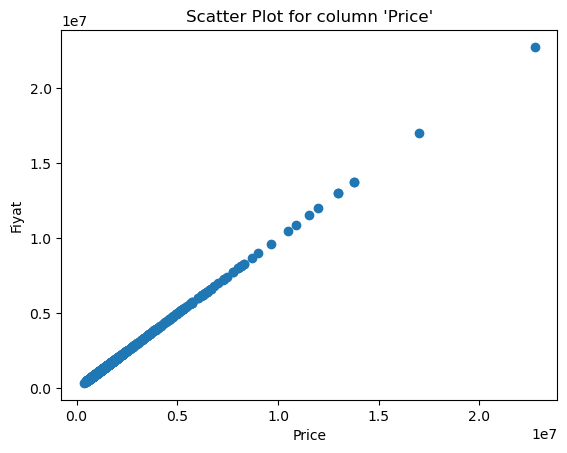

----------------------------------------------
Scatter Plot for column 'Foreign Currency'


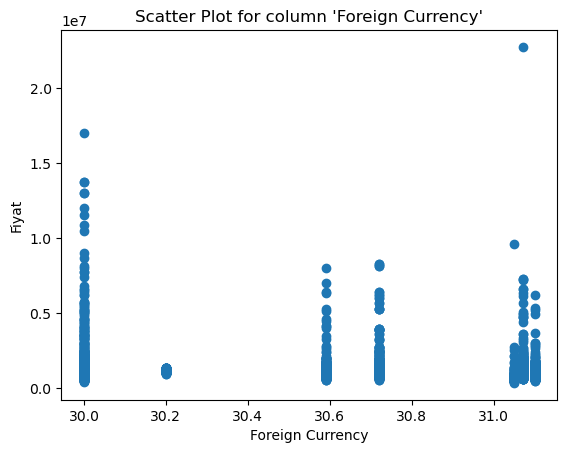

----------------------------------------------
Scatter Plot for column 'Engine Displacement'


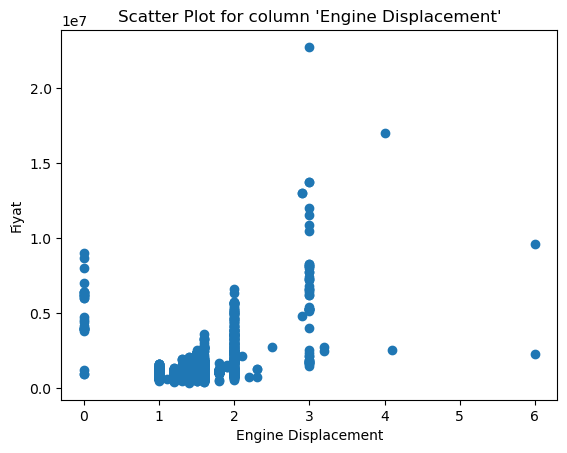

----------------------------------------------
Scatter Plot for column 'Horsepower'


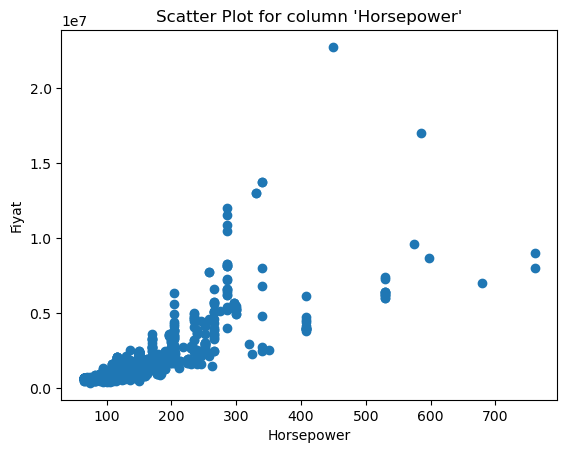

----------------------------------------------
Scatter Plot for column 'Mortgage'


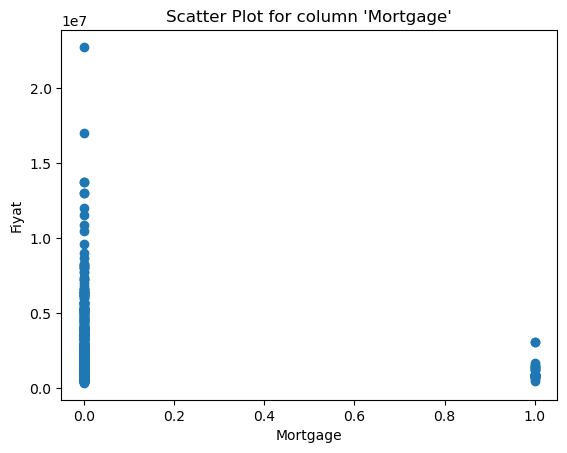

----------------------------------------------
Scatter Plot for column 'Confiscation'


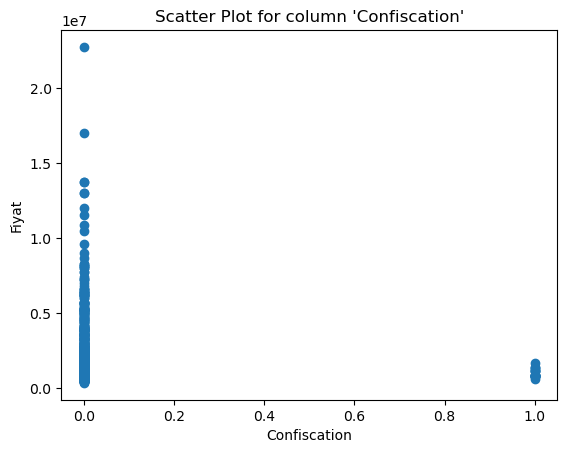

----------------------------------------------
Scatter Plot for column 'Year'


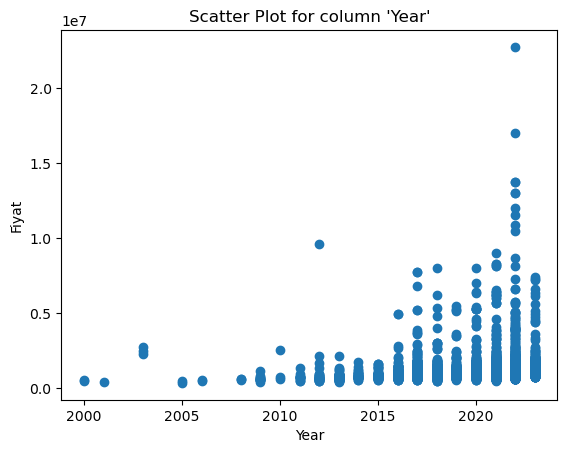

----------------------------------------------
Scatter Plot for column 'Km'


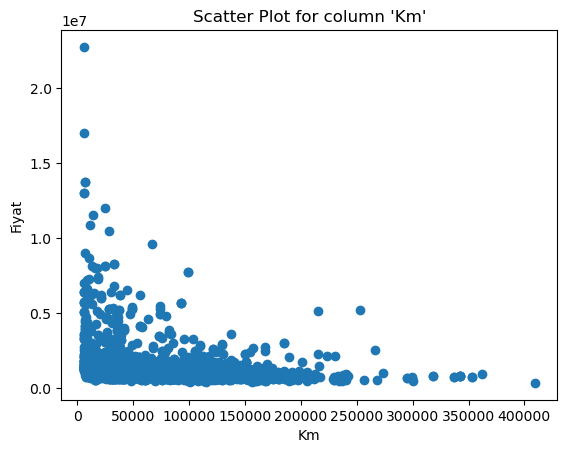

----------------------------------------------
Scatter Plot for column 'Top Speed'


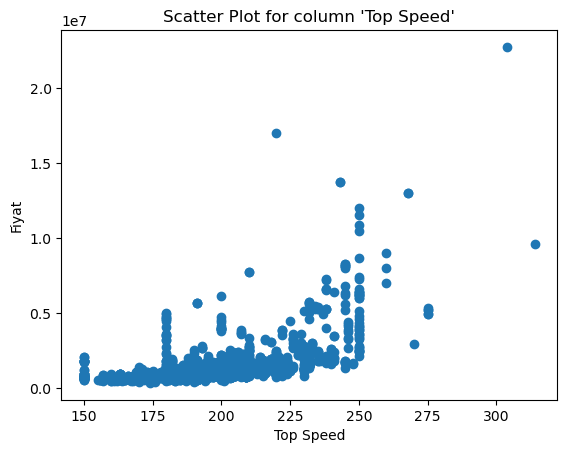

----------------------------------------------
Scatter Plot for column 'Luggage Volume'


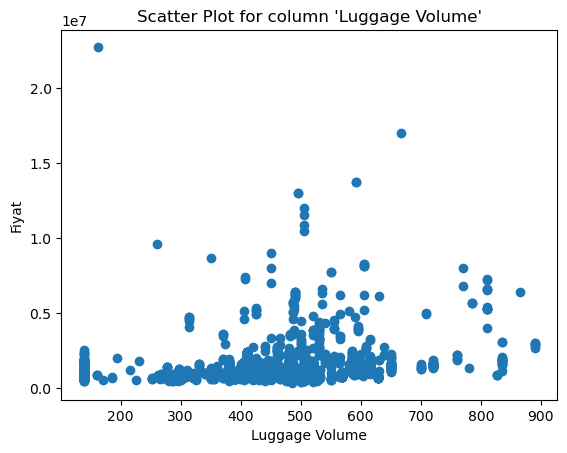

----------------------------------------------
Scatter Plot for column 'Max Torque'


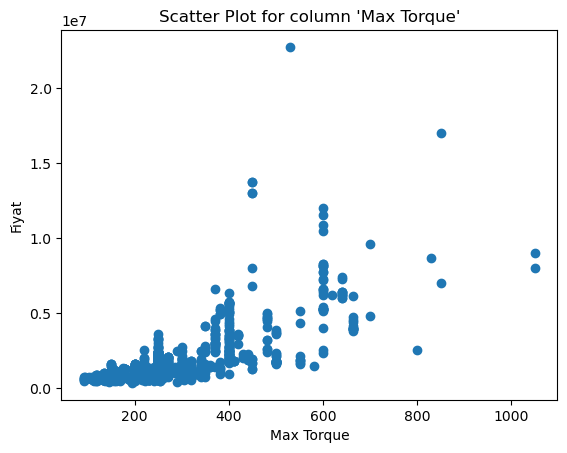

----------------------------------------------
Scatter Plot for column 'Cylinder'


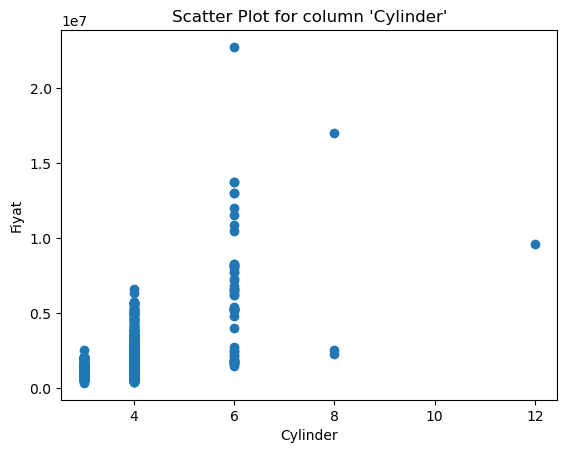

----------------------------------------------
Scatter Plot for column 'Tank'


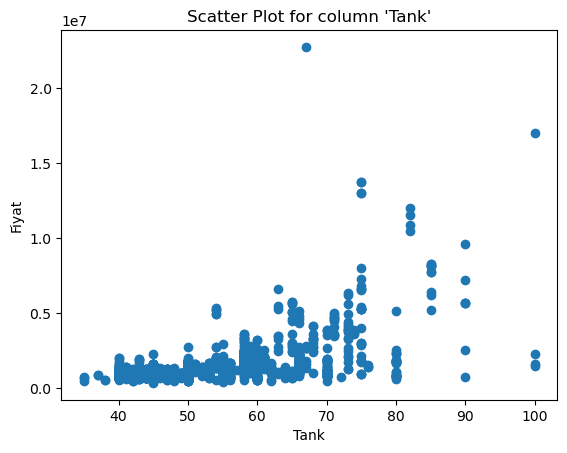

----------------------------------------------
Scatter Plot for column 'Valve'


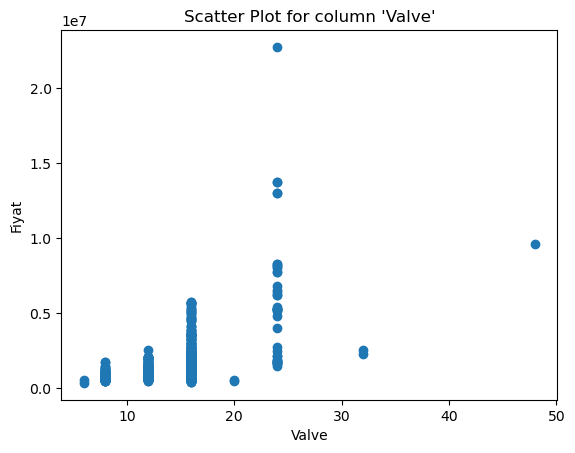

----------------------------------------------
Scatter Plot for column 'Consumption_Şehir_içi'


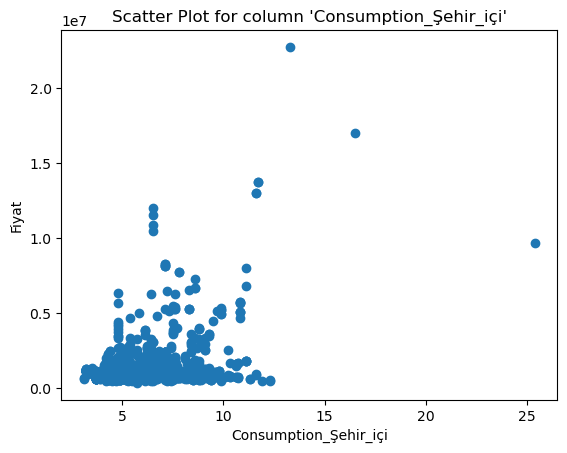

----------------------------------------------
Scatter Plot for column 'Consumption_Şehir_dışı'


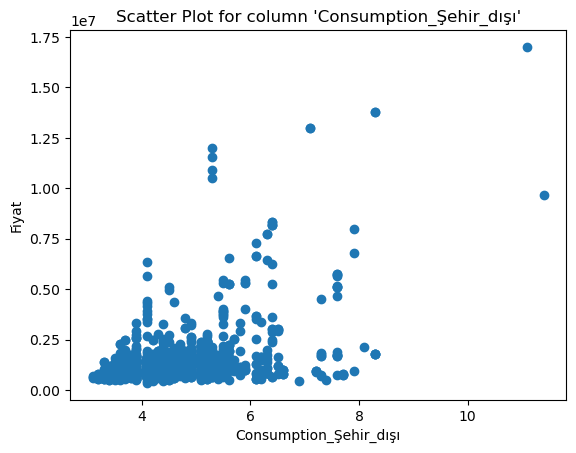

----------------------------------------------
Scatter Plot for column 'egea'


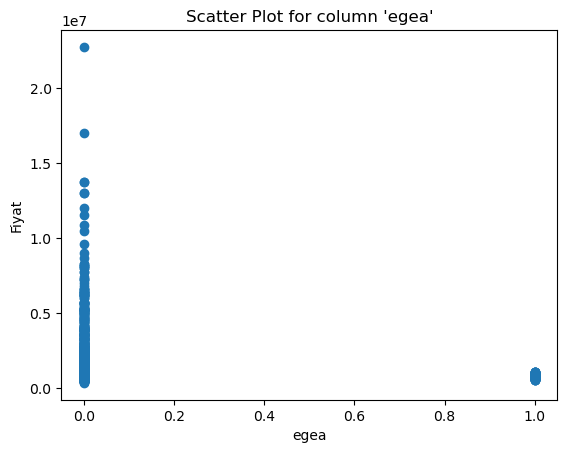

----------------------------------------------
Scatter Plot for column 'a3'


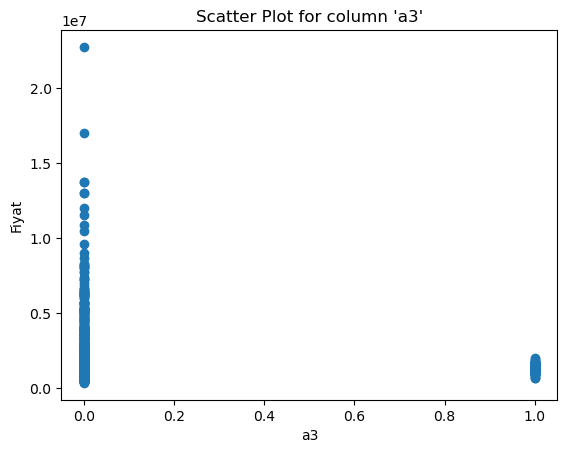

----------------------------------------------
Scatter Plot for column 'passat'


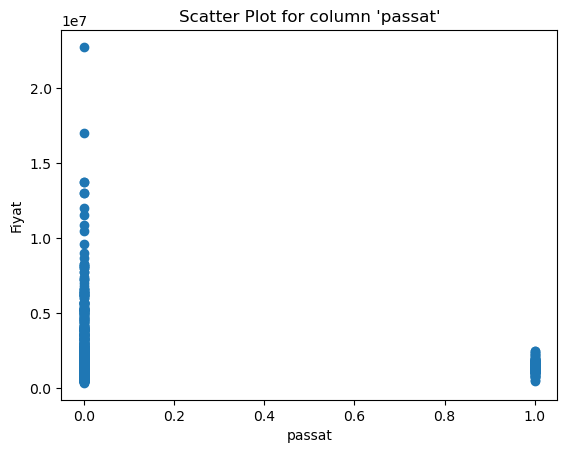

----------------------------------------------
Scatter Plot for column 'golf'


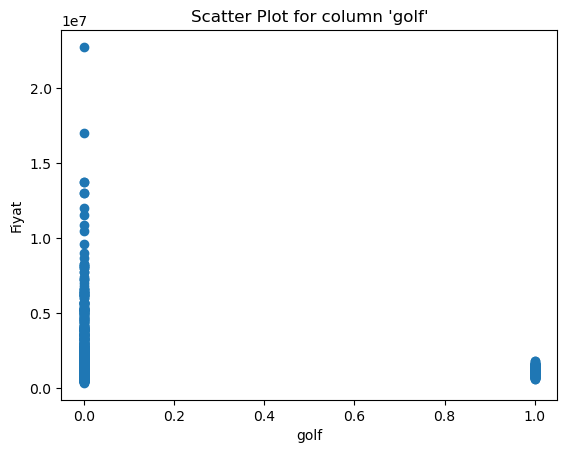

----------------------------------------------
Scatter Plot for column 'polo'


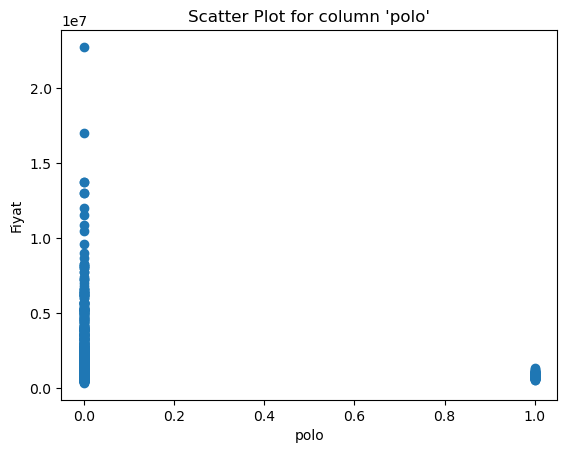

----------------------------------------------
Scatter Plot for column 'clio'


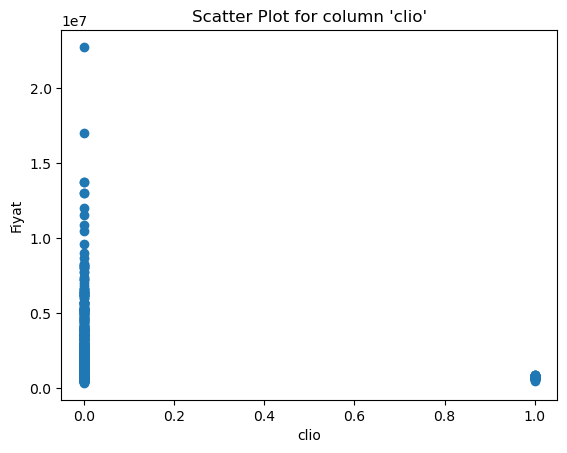

----------------------------------------------


In [11]:
num_cols = df.select_dtypes(include=['float64' , "int64","int32"]).columns

for column in num_cols:
    print(f"Scatter Plot for column '{column}'")
    plt.scatter(x = column , y = "Price", data = df)
    plt.xlabel(column)
    plt.ylabel('Fiyat')
    plt.title(f"Scatter Plot for column '{column}'")
    plt.show()
    print("----------------------------------------------")

In [12]:
df.query("`Valve` > 30")
# Drop 705, 2833, 2852

,Brand,Price,Foreign Currency,Date of Currency,Gear,Fuel,Engine Displacement,Transmission,Horsepower,Mortgage,...,Sol Arka Kapı,Sol Arka Çamurluk,Consumption_Şehir_içi,Consumption_Şehir_dışı,egea,a3,passat,golf,polo,clio
705,hummer,2300000,30.00,11.01.2024,otomatik,benzin,6.0,4x4,325,0,...,saglam,saglam,NaN,NaN,0,0,0,0,0,0
2833,bentley,9650000,31.05,23.02.2024,tiptronic,benzin,6.0,4x4,575,0,...,saglam,saglam,25.4,11.4,0,0,0,0,0,0
2852,audi,2550000,31.05,23.02.2024,tiptronic,dizel,4.1,4x4,350,0,...,saglam,saglam,10.2,6.1,0,0,0,0,0,0


In [13]:
df.query("Price > 15000000")
# Drop 1018, 1768

,Brand,Price,Foreign Currency,Date of Currency,Gear,Fuel,Engine Displacement,Transmission,Horsepower,Mortgage,...,Sol Arka Kapı,Sol Arka Çamurluk,Consumption_Şehir_içi,Consumption_Şehir_dışı,egea,a3,passat,golf,polo,clio
1018,mercedes-benz,17000000,30.00,11.01.2024,tiptronic,benzin,4.0,4x4,585,0,...,saglam,saglam,16.5,11.1,0,0,0,0,0,0
1768,porsche,22750000,31.07,23.02.2024,tiptronic,benzin,3.0,4x4,450,0,...,saglam,saglam,13.3,NaN,0,0,0,0,0,0


In [14]:
df.query("Cylinder == 12")

,Brand,Price,Foreign Currency,Date of Currency,Gear,Fuel,Engine Displacement,Transmission,Horsepower,Mortgage,...,Sol Arka Kapı,Sol Arka Çamurluk,Consumption_Şehir_içi,Consumption_Şehir_dışı,egea,a3,passat,golf,polo,clio
2833,bentley,9650000,31.05,23.02.2024,tiptronic,benzin,6.0,4x4,575,0,...,saglam,saglam,25.4,11.4,0,0,0,0,0,0


In [15]:
df.query("`Max Torque` > 1000")
# drop 398, 2987

,Brand,Price,Foreign Currency,Date of Currency,Gear,Fuel,Engine Displacement,Transmission,Horsepower,Mortgage,...,Sol Arka Kapı,Sol Arka Çamurluk,Consumption_Şehir_içi,Consumption_Şehir_dışı,egea,a3,passat,golf,polo,clio
398,porsche,8999000,30.00,11.01.2024,otomatik,elektrik,0.0,4x4,761,0,...,saglam,saglam,NaN,NaN,0,0,0,0,0,0
2987,porsche,8000000,30.59,8.02.2024,otomatik,elektrik,0.0,4x4,761,0,...,boyalı,saglam,NaN,NaN,0,0,0,0,0,0


In [16]:
df.query("`Top Speed` > 300")

,Brand,Price,Foreign Currency,Date of Currency,Gear,Fuel,Engine Displacement,Transmission,Horsepower,Mortgage,...,Sol Arka Kapı,Sol Arka Çamurluk,Consumption_Şehir_içi,Consumption_Şehir_dışı,egea,a3,passat,golf,polo,clio
1768,porsche,22750000,31.07,23.02.2024,tiptronic,benzin,3.0,4x4,450,0,...,saglam,saglam,13.3,NaN,0,0,0,0,0,0
2833,bentley,9650000,31.05,23.02.2024,tiptronic,benzin,6.0,4x4,575,0,...,saglam,saglam,25.4,11.4,0,0,0,0,0,0


In [17]:
df.query("`Engine Displacement` > 4")
# Drop 705 

,Brand,Price,Foreign Currency,Date of Currency,Gear,Fuel,Engine Displacement,Transmission,Horsepower,Mortgage,...,Sol Arka Kapı,Sol Arka Çamurluk,Consumption_Şehir_içi,Consumption_Şehir_dışı,egea,a3,passat,golf,polo,clio
705,hummer,2300000,30.00,11.01.2024,otomatik,benzin,6.0,4x4,325,0,...,saglam,saglam,NaN,NaN,0,0,0,0,0,0
2833,bentley,9650000,31.05,23.02.2024,tiptronic,benzin,6.0,4x4,575,0,...,saglam,saglam,25.4,11.4,0,0,0,0,0,0
2852,audi,2550000,31.05,23.02.2024,tiptronic,dizel,4.1,4x4,350,0,...,saglam,saglam,10.2,6.1,0,0,0,0,0,0


In [18]:
df.query("`Horsepower` > 600")
# Drop 2988

,Brand,Price,Foreign Currency,Date of Currency,Gear,Fuel,Engine Displacement,Transmission,Horsepower,Mortgage,...,Sol Arka Kapı,Sol Arka Çamurluk,Consumption_Şehir_içi,Consumption_Şehir_dışı,egea,a3,passat,golf,polo,clio
398,porsche,8999000,30.00,11.01.2024,otomatik,elektrik,0.0,4x4,761,0,...,saglam,saglam,NaN,NaN,0,0,0,0,0,0
2987,porsche,8000000,30.59,8.02.2024,otomatik,elektrik,0.0,4x4,761,0,...,boyalı,saglam,NaN,NaN,0,0,0,0,0,0
2988,porsche,7000000,30.59,8.02.2024,otomatik,elektrik,0.0,4x4,680,0,...,saglam,saglam,NaN,NaN,0,0,0,0,0,0


In [19]:
df.query("`Km` > 390000")
# Drop 2863

,Brand,Price,Foreign Currency,Date of Currency,Gear,Fuel,Engine Displacement,Transmission,Horsepower,Mortgage,...,Sol Arka Kapı,Sol Arka Çamurluk,Consumption_Şehir_içi,Consumption_Şehir_dışı,egea,a3,passat,golf,polo,clio
2863,seat,361900,31.05,23.02.2024,manuel,dizel,1.4,önden çekiş,75,0,...,boyalı,boyalı,5.7,4.1,0,0,0,0,0,0


In [20]:
drop_columns = [2863, 2988, 705,398, 2987,705, 2833, 2852, 1018, 1768]
df.drop(drop_columns , inplace=True)

In [21]:
# Feature engineering
df["Age"] = 2024 - df["Year"]


In [22]:
df.drop(columns="Year", inplace=True)

In [23]:
df.head()

,Brand,Price,Foreign Currency,Date of Currency,Gear,Fuel,Engine Displacement,Transmission,Horsepower,Mortgage,...,Sol Arka Çamurluk,Consumption_Şehir_içi,Consumption_Şehir_dışı,egea,a3,passat,golf,polo,clio,Age
0,audi,1278000,30.0,11.01.2024,tiptronic,benzin,1.5,önden çekiş,150,0,...,"lokal boyalı, çizik",6.2,4.3,0,1,0,0,0,0,4
1,audi,1274000,30.0,11.01.2024,tiptronic,benzin,1.5,önden çekiş,150,0,...,saglam,4.1,4.1,0,1,0,0,0,0,4
2,volkswagen,1687000,30.0,11.01.2024,otomatik,dizel,2.0,4x4,199,0,...,ezik,10.7,7.3,0,0,0,0,0,0,5
3,volkswagen,1460000,30.0,11.01.2024,otomatik,dizel,1.6,önden çekiş,120,0,...,saglam,4.6,3.8,0,0,1,0,0,0,5
4,volkswagen,1457500,30.0,11.01.2024,otomatik,dizel,1.6,önden çekiş,120,0,...,boyalı,4.6,3.8,0,0,1,0,0,0,5


In [24]:
# Brand yerine araç fiyatlarının ortakaması ile dolduruldu. target-encoding 
target_mean = df.groupby('Brand')['Price'].mean()
df['Brand'] = df['Brand'].map(target_mean)

In [25]:
df["Price"] = df["Price"] / df["Foreign Currency"]

df.drop(columns="Foreign Currency", inplace=True)
df.drop(columns="Date of Currency", inplace=True)

In [26]:
baslangic = "Kaput"
bitis = "Sol Arka Çamurluk"

columns = df.loc[:,baslangic:bitis]
for column_name, column_values in columns.items():
    for index, value in column_values.items():
        if "saglam" in str(value).lower():
            df.at[index, column_name] = 1
        else:
            df.at[index, column_name] = 0
     


In [27]:
one_hot_columns = ["Gear", "Fuel","Transmission","Colour","Area of Use"]

encoded_df = pd.get_dummies(df, columns=one_hot_columns)

In [28]:
encoded_df.head()

,Brand,Price,Engine Displacement,Horsepower,Mortgage,Confiscation,Inspection,Km,Top Speed,Luggage Volume,...,Area of Use_cabriolet,Area of Use_cityvan,Area of Use_coupe,Area of Use_hatchback,Area of Use_minibüs,Area of Use_mpv,Area of Use_panel,Area of Use_pick-up,Area of Use_sedan,Area of Use_wagon
0,2.344372e+06,42600.000000,1.5,150,0,0,23.06.2025,93228,224.0,425.0,...,False,False,False,False,False,False,False,False,True,False
1,2.344372e+06,42466.666667,1.5,150,0,0,16.06.2025,19707,220.0,380.0,...,False,False,False,True,False,False,False,False,False,False
2,1.307587e+06,56233.333333,2.0,199,0,0,28.06.2024,83365,199.0,139.0,...,False,True,False,False,False,False,False,False,False,False
3,1.307587e+06,48666.666667,1.6,120,0,0,29.06.2025,84000,205.0,586.0,...,False,False,False,False,False,False,False,False,True,False
4,1.307587e+06,48583.333333,1.6,120,0,0,1.01.2024,81245,205.0,586.0,...,False,False,False,False,False,False,False,False,True,False


In [29]:
import pandas as pd 
data = pd.read_csv("car.csv")
df = data.copy()

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

df = df.dropna()

X, y = df.drop(columns=["Price", "Inspection"]), df["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

# Lineer Regresyon modelinin performansını test edin
y_pred_linear_train = model_linear.predict(X_train)
r2_linear_train = r2_score(y_train, y_pred_linear_train)
print("Linear Regression Train R^2 Score:", r2_linear_train)

y_pred_linear_test = model_linear.predict(X_test)
r2_linear_test = r2_score(y_test, y_pred_linear_test)
print("Linear Regression Test R^2 Score:", r2_linear_test)
print("------------------------")
model_random_forest = RandomForestRegressor(n_estimators=100, min_samples_split=2)
model_random_forest.fit(X_train, y_train)

y_pred_rf_train = model_random_forest.predict(X_train)
r2_rf_train = r2_score(y_train, y_pred_rf_train)
print("Random Forest Train R^2 Score:", r2_rf_train)

r2_rf_test = r2_score(y_test, y_pred_rf_test)
print("Random Forest Test R^2 Score:", r2_rf_test)
print("------------------------")
model_gradient_boosting = GradientBoostingRegressor(n_estimators=80, min_samples_split=2)
model_gradient_boosting.fit(X_train, y_train)

y_pred_gb_train = model_gradient_boosting.predict(X_train)
r2_gb_train = r2_score(y_train, y_pred_gb_train)
print("Gradient Boosting Train R^2 Score:", r2_gb_train)

y_pred_gb_test = model_gradient_boosting.predict(X_test)
r2_gb_test = r2_score(y_test, y_pred_gb_test)
print("Gradient Boosting Test R^2 Score:", r2_gb_test)


Linear Regression Train R^2 Score: 0.8198305088919999
Linear Regression Test R^2 Score: 0.7305875058140561
------------------------
Random Forest Train R^2 Score: 0.9892878165669898


NameError: name 'y_pred_rf_test' is not defined